# Mnist Dataset

![Image of Sample Mnist Dataset](https://camo.githubusercontent.com/2eefe56bdacb4d28015c435d0801abf00b95b95f/68747470733a2f2f636f72706f637261742e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031342f31302f6669677572655f312e706e67)

## What is the Mnist Dataset?

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. (Source:http://yann.lecun.com/exdb/mnist/)

*The files from the dataset are also available from the website above but I have them saved here on github for easy access*

## Reading in the file

In [1]:
# Because the file is compressed (.gz) we have to unzip it we do this using a python library called gzip

import gzip

with gzip.open('Dataset/t10k-images-idx3-ubyte.gz','rb') as f:        
    file_content = f.read()
    
# If we do a simple type() function we can see what is file_content now

type(file_content)


bytes

## Reading in bytes

The first 16 bytes of an image file allow us to retrieve information about the file.

In [2]:
print(int.from_bytes(file_content[0:4], byteorder='big'))
print(int.from_bytes(file_content[4:8], byteorder='big'))
print(int.from_bytes(file_content[8:12], byteorder='big'))
print(int.from_bytes(file_content[12:16], byteorder='big'))

2051
10000
28
28


These four bits of information actually tell us a lot about the file.

First 2051 tells us that it is an unsigned int.

The 1000 tells us the amount of images in the file.

Both the 28's tell us that there is 28 rows of pixels and 28 columns of pixels which should be the case for the image size.

## Reading in a single image

To read in a single image file we just have to skip the first 16 bytes in the file_contents array and then go to 800 as the size of the image is 28x28 which is 784.

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 171  70  96 104 195 219 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255  33   1   1   1   1  14  57  57  57  5

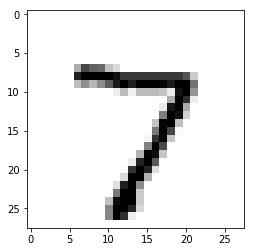

In [3]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## get the image details from the file_content index 16-800 , reshape it back into a picture (28x28)
image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

image2 = ~np.array(list(file_content[800:1584])).reshape(28,28).astype(np.uint8)

## As we can see here the image is simply displayed as a 2-D array of pixels, but we can use plt.imshow() to actually 
## bring the pixels to life
print(image)

plt.imshow(image, cmap='gray')



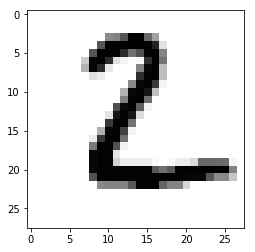

In [4]:
## The second image in the file

plt.imshow(image2, cmap='gray')

## Reading in a single label

Reading in a label is just as simple, but we just need to skip the first 8 bytes instead of 16 because it is just a 1D array.

In [5]:
import gzip

## Import our label training set
with gzip.open('Dataset/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

In [6]:
int.from_bytes(labels[8:9], byteorder="big")

7

In [7]:
int.from_bytes(labels[9:10], byteorder="big")

2

# Building our neural network

## Building our model

In [8]:
# Import keras.
import keras as kr
from keras.models import Sequential
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 1000 neurons and an input layer with 784.
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
with gzip.open('dataset/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

with gzip.open('dataset/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()
    
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8)/ 255.0
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

In [10]:
inputs = train_img.reshape(60000, 784)

In [11]:

# For encoding categorical variables.
import sklearn.preprocessing as pre

encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

print(train_lbl[0], outputs[0])

5 [0 0 0 0 0 1 0 0 0 0]


In [12]:
model.fit(inputs, outputs, epochs=5, batch_size=100)

Epoch 1/5
60000/60000 [==============================] - 12s 195us/step - loss: 0.5545 - acc: 0.8221
Epoch 2/5
60000/60000 [==============================] - 13s 215us/step - loss: 0.3033 - acc: 0.9056
Epoch 3/5
60000/60000 [==============================] - 12s 203us/step - loss: 0.2603 - acc: 0.9181
Epoch 4/5
60000/60000 [==============================] - 14s 234us/step - loss: 0.2315 - acc: 0.9271
Epoch 5/5
60000/60000 [==============================] - 14s 228us/step - loss: 0.2116 - acc: 0.9343


## Load in our test data 

In [13]:
with gzip.open('dataset/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('dataset/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
## Reshape our image 

##    all images in the training set have an range from 0-1
##    and not from 0-255 so we divide our flatten images
##    (a one dimensional vector with our 784 pixels)
##    to use the same 0-1 based range
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

In [14]:
## Compare our predictions vs actual results
(encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()

9501

In [15]:
## Test our model
model.predict(test_img[7:8])

array([[4.2084147e-07, 9.9889779e-01, 1.1035599e-05, 4.5841139e-06,
        3.1725623e-04, 1.0117713e-05, 4.5498520e-05, 2.5896588e-04,
        3.8793572e-04, 6.6375702e-05]], dtype=float32)

In [19]:
## We can use encoder.inverse_transform() to reverse our binary transform to get the number it thinks it is
encoder.inverse_transform(model.predict(test_img[7:8]))

array([9], dtype=uint8)

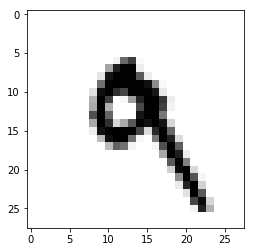

In [18]:
## As we can see here our model correctly predicted the image
plt.imshow(test_img[7].reshape(28, 28), cmap='gray')